## 准备数据



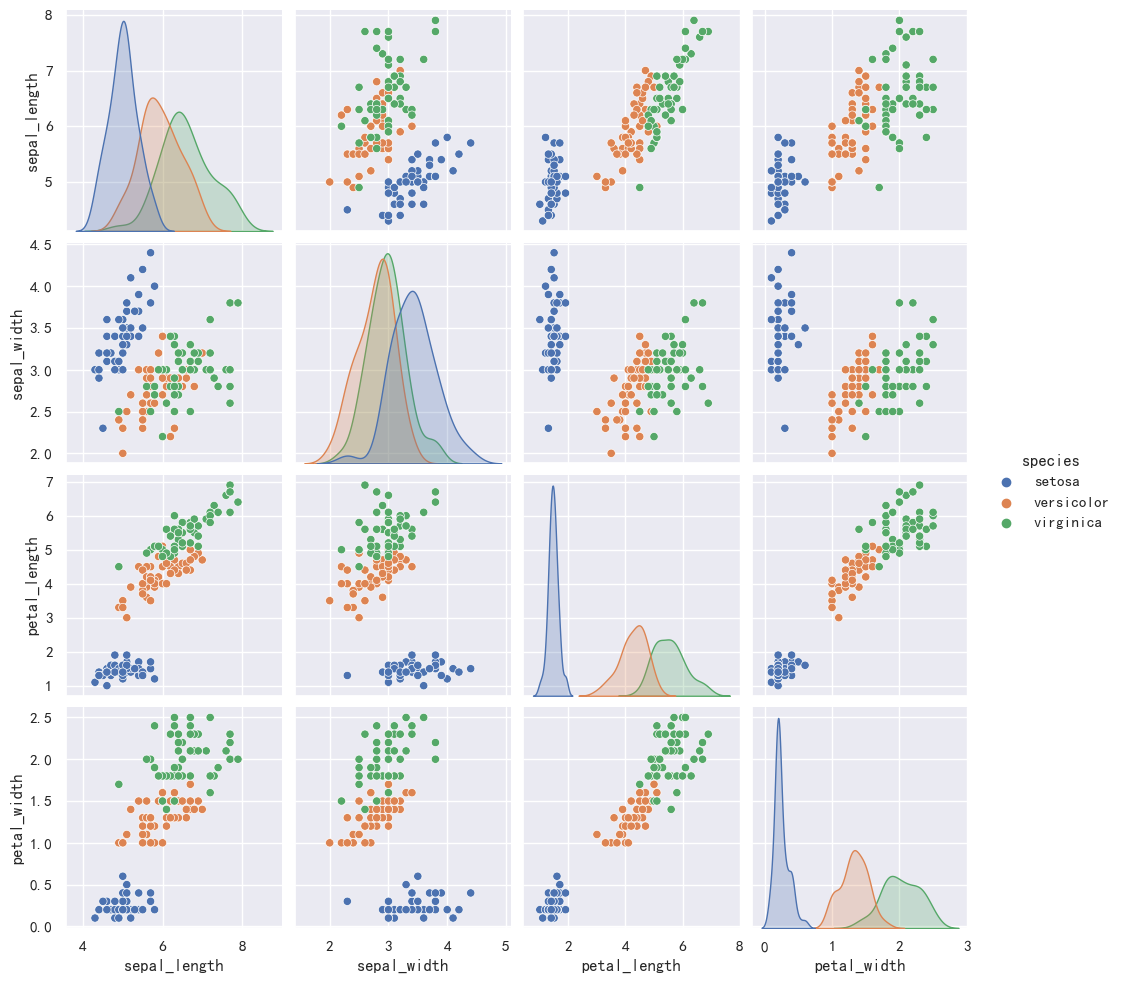

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load data
iris = sns.load_dataset("iris")
sns.pairplot(iris, hue='species')


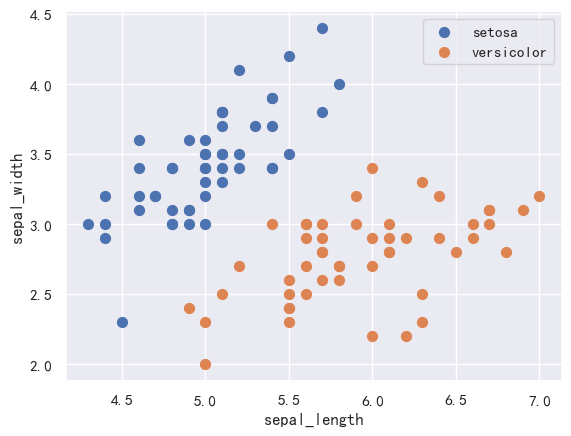

In [113]:
# 取出'sepal_length'，'sepal_width'和'species'，前100个数据，前50个'species'是'setosa'，后50个'species'是'versicolor'
data = np.array(iris.iloc[:100, [0, 1, -1]])
# 第一维度全部取出(100行)，第二维度取出第一个列，到倒数第二个列
X = data[:,:-1]
# 二分类'species'标签，'setosa'值为-1，'versicolor'值为1
y = np.array([1 if s == 'versicolor' else -1 for s in data[:,-1]])

fig, ax = plt.subplots()
sct = ax.scatter(X[:50, 0], X[:50, 1], s=50, label='setosa')
sct = ax.scatter(X[50:100, 0], X[50:100, 1], s=50, label='versicolor')
ax.set_xlabel('sepal_length')
ax.set_ylabel('sepal_width')
ax.legend()

In [114]:
import sklearn
from sklearn.linear_model import Perceptron

clf = Perceptron(fit_intercept=True, max_iter=1000, shuffle=True)
clf.fit(X, y)

x_line_g = np.arange(4, 8)
y_line_g = -(clf.coef_[0][0]*x_line_g + clf.intercept_)/clf.coef_[0][1]

Text(0.5, 1.0, 'skPerceptron')

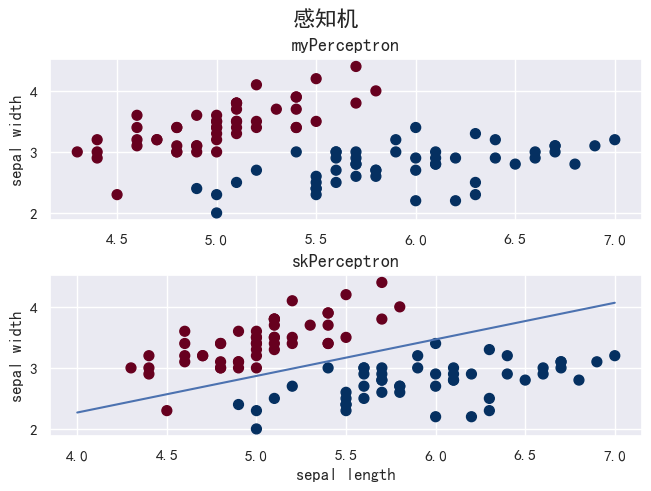

In [125]:
fig, ax = plt.subplots(2, 1, constrained_layout=True, sharey=True)
fig.suptitle('感知机', fontsize=16)

ax[0].scatter(X[:, 0], X[:, 1], s=50, c=y, cmap='RdBu')
ax[0].set_ylabel('sepal width')
ax[0].set_title('myPerceptron', fontsize=13)

ax[1].scatter(X[:, 0], X[:, 1], s=50, c=y, cmap='RdBu')
# 感知机线
ax[1].plot(x_line_g, y_line_g)
ax[1].set_xlabel('sepal length')
ax[1].set_ylabel('sepal width')
ax[1].set_title('skPerceptron', fontsize=13)